# Project Description

In this project, we'll be extracting instrument tracks from a whole mix of music.

# Imports

In [103]:
import pandas as pd
import numpy as np
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import crepe


In [99]:
!pip install crepe

##### Import audio with Librosa

In [15]:
audiofile, sr = librosa.load('mix.mp3')

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [84]:
audiofile

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [85]:
sr

22050

In [39]:
df = pd.DataFrame(audiofile)

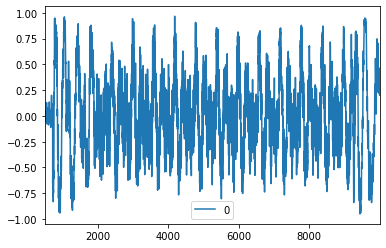

In [83]:
df[500:10000].plot()

##### Estimate tempo

In [40]:
librosa.beat.tempo(y=audiofile, sr=sr)

array([151.99908088])

##### Plot waveform

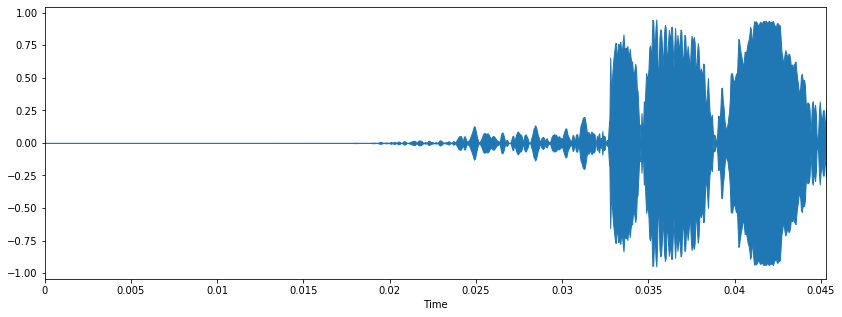

In [87]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audiofile[:1000], sr=sr)

##### Display spectrogram

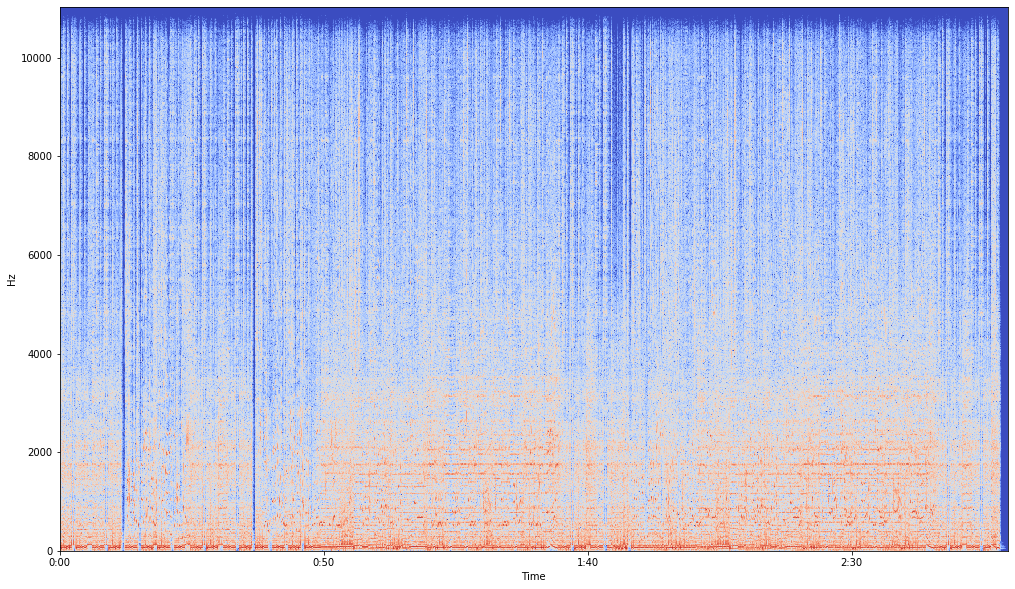

In [89]:
X = librosa.stft(audiofile)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(17, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [91]:
Xdb.shape

(1025, 7737)

##### Play Audio File

In [96]:
play = lambda x: ipd.Audio(x)

In [112]:
play('mix.mp3')

In [113]:
play('10_ElecGtr01.mp3')

##### Save Audio File

In [ ]:
librosa.output.write_wav('audio/audiofile.wav', audiofile, sr)


##### Espectrogram Component Decomposition 

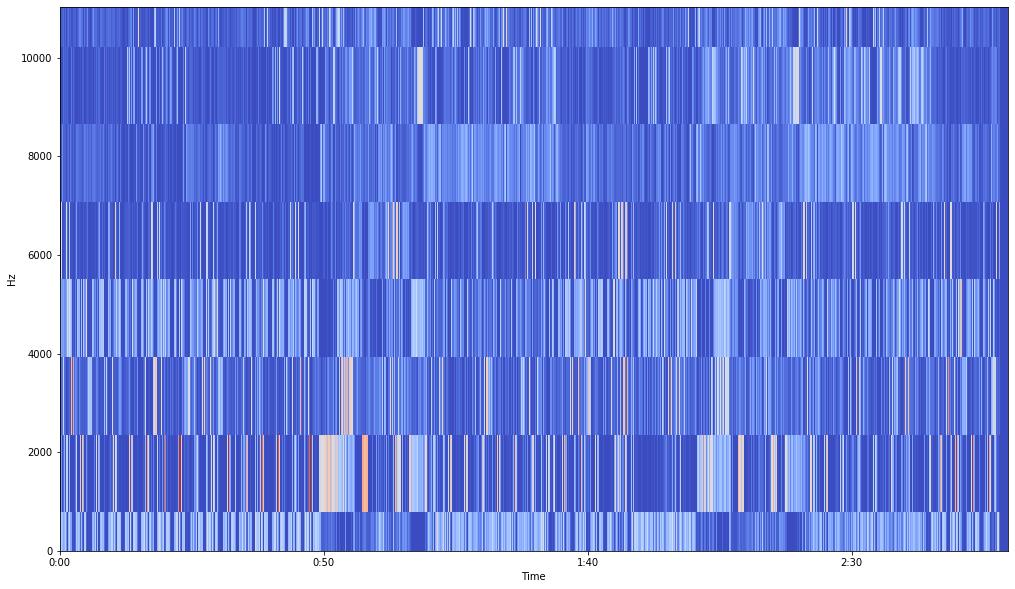

In [78]:
# y, sr = librosa.load(librosa.util.example_audio_file())
S = np.abs(librosa.stft(audiofile))
comps, acts = librosa.decompose.decompose(S, n_components=8)


plt.figure(figsize=(17,10))
librosa.display.specshow(acts, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')

In [60]:
ipd.Audio(data=acts[0], rate=sr, normalize=True)

##### CNN Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation=’relu’))
model.add(Flatten())
model.add(Dense(10, activation=’softmax’))

#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

##### Sine wave

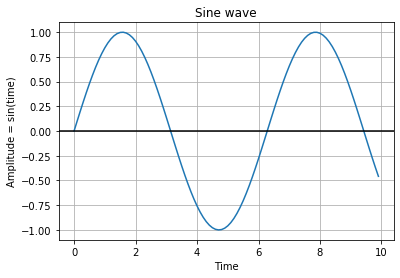

In [108]:
# Get x values of the sine wave
time= np.arange(0, 10, 0.1);

# Amplitude of the sine wave is sine of a variable like time
amplitude= np.sin(time)

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude)

# Give a title for the sine wave plot
plt.title('Sine wave')

# Give x axis label for the sine wave plot
plt.xlabel('Time')

# Give y axis label for the sine wave plot
plt.ylabel('Amplitude = sin(time)')

plt.grid(True, which='both')

plt.axhline(y=0, color='k')

plt.show()

##### Pitch recognition with crepe

In [104]:
# sr, audio = wavfile.read('mix.mp3')
time, frequency, confidence, activation = crepe.predict(audiofile, sr, viterbi=True)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/opt/anaconda3/lib/python3.7/site-packages/crepe/core.py:209: RuntimeWarning: divide by zero encountered in true_divide
  frames /= np.std(frames, axis=1)[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/crepe/core.py:209: RuntimeWarning: invalid value encountered in true_divide
  frames /= np.std(frames, axis=1)[:, np.newaxis]


17965/17965 [==============================] - 491s 27ms/sample


In [116]:
time

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [117]:
frequency

array([32.42192095, 32.54557932, 32.53473184, ...,  0.        ,
        0.        ,  0.        ])

In [118]:
confidence

array([0.37032956, 0.04025438, 0.02190706, ...,        nan,        nan,
              nan], dtype=float32)

In [119]:
activation

array([[3.4630299e-05, 4.2617321e-05, 4.0054321e-05, ..., 6.0677528e-05,
        7.5787306e-05, 7.5727701e-05],
       [8.0909133e-03, 9.9307001e-03, 1.0580897e-02, ..., 4.0119886e-04,
        4.1007996e-04, 7.0869923e-04],
       [1.1373490e-02, 1.1161685e-02, 1.2725890e-02, ..., 8.8372827e-04,
        9.6303225e-04, 1.5405715e-03],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)